In [2]:
# 命名したclusterでプロット後、各サンプルごとに各クラスターを集計する関数
# data=seurat.object(clusterプロット直後)
# types=cluster名(重複可)
cluster_count_function <- function(data,types){ 
    samplename <- c(unique(data[[]]$orig.ident))
    types2 <- unique(types)
    
    data <- AddMetaData(
    object=data,
    metadata=Idents(data),
    col.name='cell_type')
    
    # 入れ物用意
    values <- rep(0,length(samplename))
    names(values) <- samplename
    values <- t(as.data.frame(values))
    
    # countする
    for(i in 1:length(types2)){
    cr <- c()
        for(j in 1:length(samplename)){
            cr <- c(cr,dim(data[[]] %>% filter(cell_type==types2[i])%>% filter(orig.ident==samplename[j])
                %>%select(orig.ident))[1])
        }
    values <- rbind(values,cr)
    }
    rownames(values) <- c('emp',types2)
    cluster_count <- values[-1,]
    return(cluster_count)
    }

In [40]:
# これらの遺伝子によりクラスターができるのを防ぐため
remove_some_genes <- function(pbmc, genes=c("^RPS","^RPL","^MT-","MALAT1","NEAT")) {
    pbmc_sce <- as.SingleCellExperiment(pbmc)

    for (gene in genes){
        counts(pbmc_sce)[rownames(pbmc_sce)[grepl(gene, rownames(pbmc_sce))],] = 0
    }

    return (as.Seurat(pbmc_sce, counts = "counts"))
}


In [9]:
getwd()

[1] "/home/tsubosaka/stomach_normal_marker"

In [4]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Welcome to enrichR
Checking connection ... Connection is Live!


In [5]:
library(schex)

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following object is masked from ‘package:Matrix’:

    which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, M

In [6]:
all <- readRDS('seurat_object/N-stomach-all.rds')

In [7]:
reticulate::import(module='umap')

Module(umap)

In [8]:
UMAP <- function(data.integrated, dims=1:30){
    data.integrated <- RunPCA(data.integrated, verbose = FALSE)
    data.integrated <- RunUMAP(data.integrated, dims = 1:30, verbose = FALSE, umap.method = 'umap-learn', metric = 'correlation')
    data.integrated <- FindNeighbors(data.integrated, dims = 1:30, verbose = FALSE)
    data.integrated <- FindClusters(data.integrated, verbose = FALSE)
    return (data.integrated)
}

In [10]:
immunes <- readRDS('seurat_object//N-stomach-immune.rds')

In [11]:
immunes

An object of class Seurat 
33538 features across 13278 samples within 1 assay 
Active assay: RNA (33538 features)
 2 dimensional reductions calculated: pca, umap

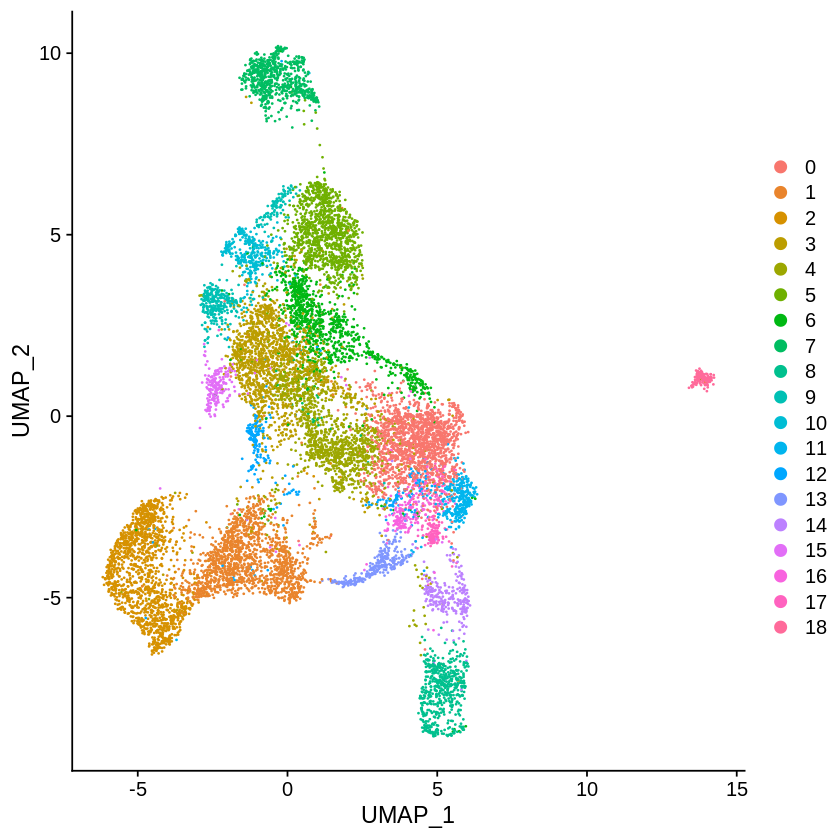

In [12]:
DimPlot(immunes)

In [13]:
Ts <- readRDS('seurat_object//N-stomach-Ts.rds')
Bs <- readRDS('seurat_object//N-stomach-B.rds')
plasmas <- readRDS('seurat_object//N-stomach-plasmas_UMAP3.rds')

In [16]:
colors <- readRDS('seurat_object/a/distinct_colors.Rds')

In [18]:
length(unique(Ts[[]]$seurat_clusters))

[1] 13

In [23]:
as.character(colors[13])

[1] "c(\"#B13AE6\", \"#7BE2CC\", \"#84AED6\", \"#7BE36F\", \"#8775D7\", \"#E26363\", \"#D2E056\", \"#DAD1D6\", \"#DDA767\", \"#DD5ACA\", \"#D3E4AB\", \"#D691BF\", \"#7A8A74\")"

In [25]:
T.colors <- c("#B13AE6", "#7BE2CC", "#84AED6", "#7BE36F", 
              "#8775D7", "#E26363", "#D2E056", "#DAD1D6", 
               "#DDA767", "#DD5ACA", "#D3E4AB", "#D691BF", 
              "#7A8A74")

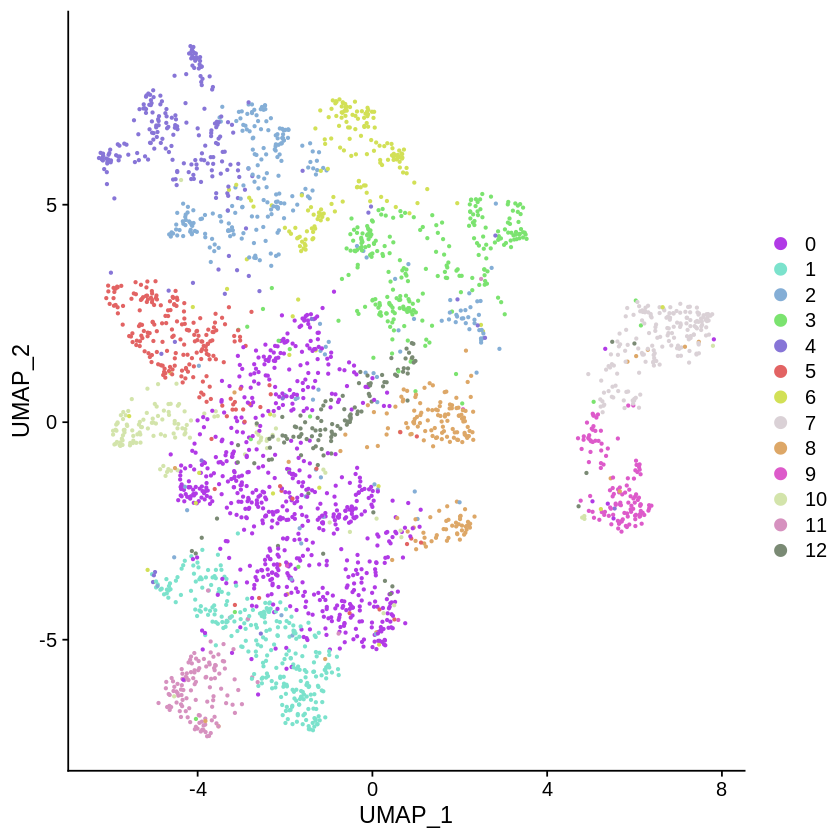

In [28]:
DimPlot(Ts,group.by='seurat_clusters',
        cols= T.colors)

In [29]:
length(unique(Bs[[]]$seurat_clusters))

[1] 14

In [30]:
as.character(colors[14])

[1] "c(\"#7DE4CF\", \"#78886F\", \"#89E18D\", \"#9EE947\", \"#E66D4F\", \"#C842DC\", \"#89C8DB\", \"#DA70B8\", \"#DCE2C1\", \"#D9BED8\", \"#DACE63\", \"#DA9B8F\", \"#876FDA\", \"#8699D6\")"

In [33]:
B.colors <- c("#7DE4CF", "#78886F", "#89E18D", "#9EE947", "#E66D4F", "#C842DC", "#89C8DB", "#DA70B8", "#DCE2C1", "#D9BED8", "#DACE63", "#DA9B8F", "#876FDA", "#8699D6")

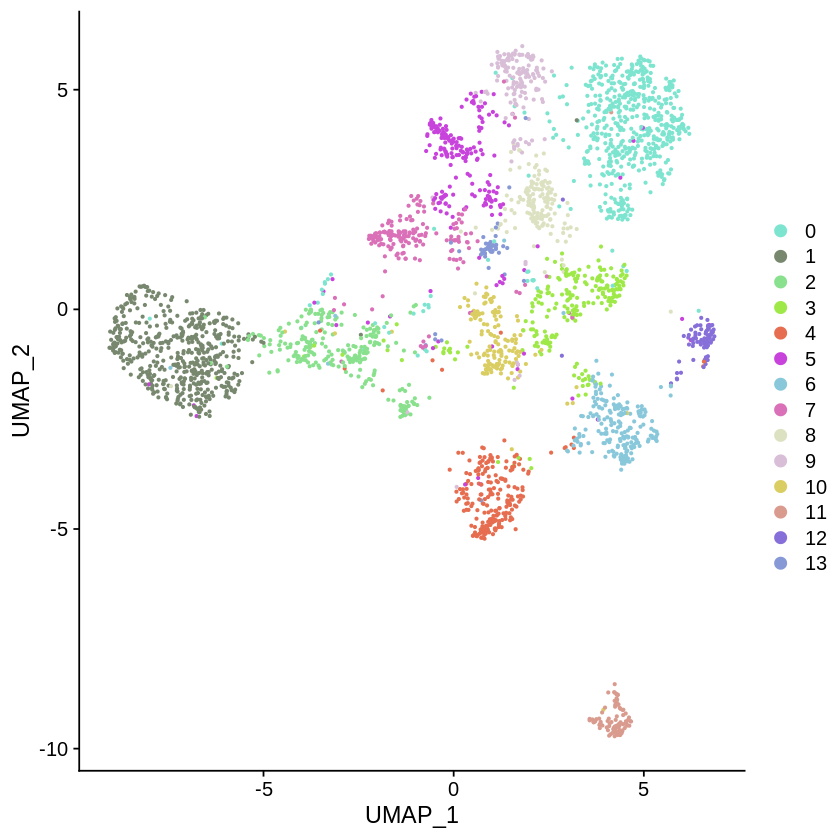

In [34]:
DimPlot(Bs,group.by='seurat_clusters',
        cols= B.colors)

In [36]:
length(unique(plasmas[[]]$seurat_clusters))

[1] 9

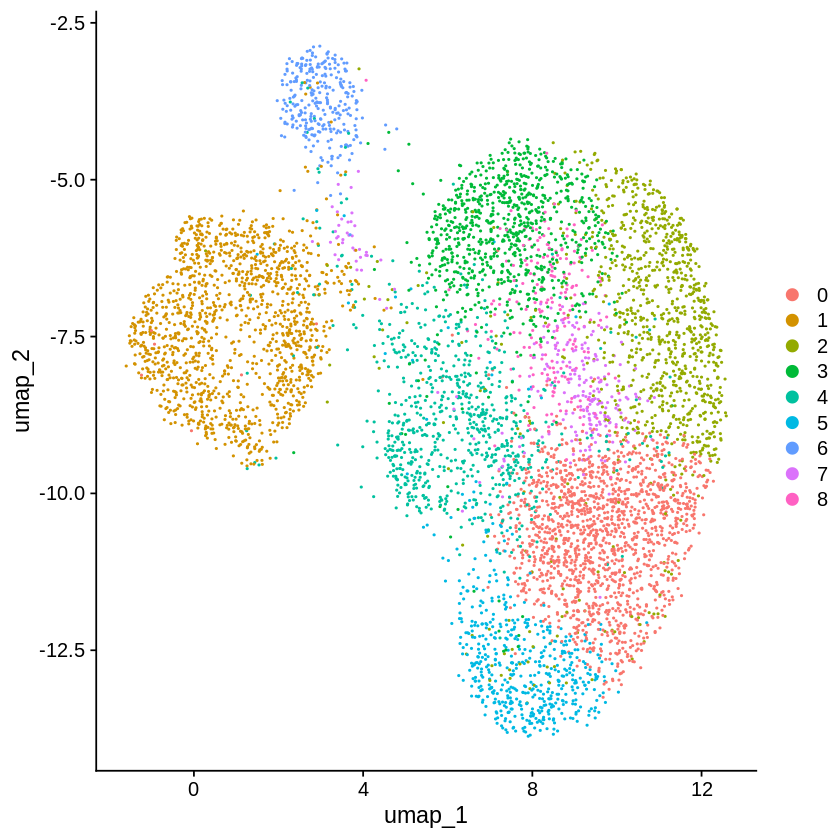

In [38]:
DimPlot(plasmas,group.by='seurat_clusters')

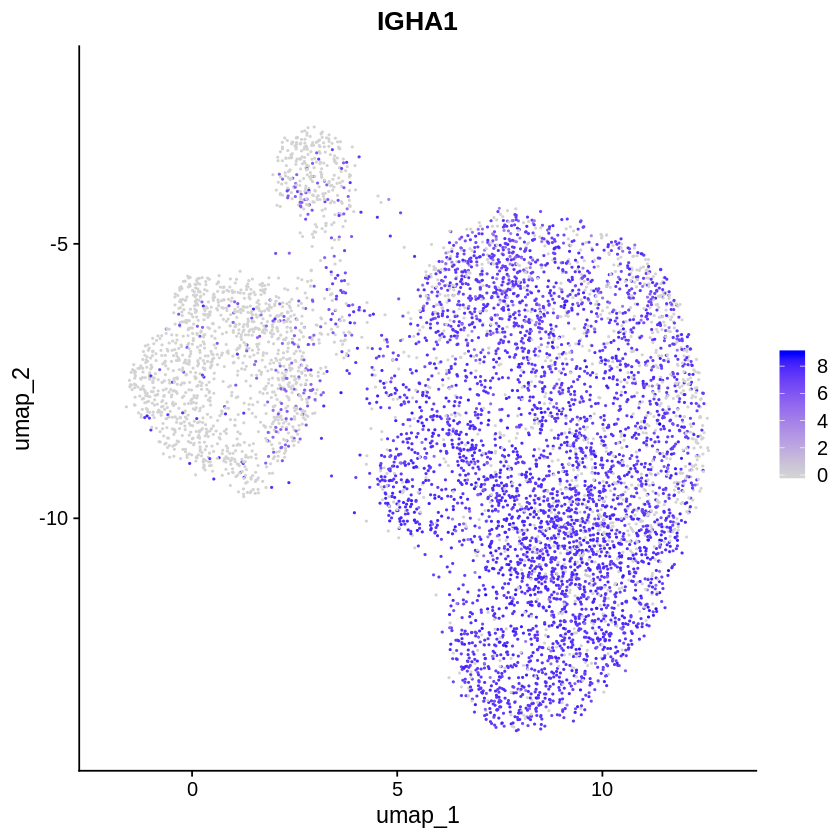

In [39]:
FeaturePlot(plasmas,features='IGHA1')

In [41]:
# これらの遺伝子によりクラスターができるのを防ぐため
remove_some_genes <- function(pbmc, genes=c("^RPS","^RPL","^MT-","MALAT1","NEAT")) {
    pbmc_sce <- as.SingleCellExperiment(pbmc)

    for (gene in genes){
        counts(pbmc_sce)[rownames(pbmc_sce)[grepl(gene, rownames(pbmc_sce))],] = 0
    }

    return (as.Seurat(pbmc_sce, counts = "counts"))
}


In [43]:
plasmas <- remove_some_genes(plasmas, genes=c('^IG','JCHAIN'))

Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to PC_”Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to UMAP_”

In [49]:
plasmas@assays$RNA['IGHA1']

   [[ suppressing 6808 column names ‘AAACCTGAGGCTAGCA_1_1_1_1_1’, ‘AAAGATGTCAGTTCGA_1_1_1_1_1’, ‘AAAGTAGAGGCATGGT_1_1_1_1_1’ ... ]]


1 x 6808 sparse Matrix of class "dgCMatrix"
                                                                             
IGHA1 8.062586 7.957453 7.309865 7.892797 8.263344 7.579118 7.651674 7.045713
                                                                        
IGHA1 8.564239 7.826057 7.590772 7.646643 7.777607 7.301182 . . 7.411446
                                                                          
IGHA1 7.944685 7.441086 8.476536 7.958318 7.568214 . . . 7.420547 7.646291
                                                                               
IGHA1 7.046336 6.664885 . 7.274052 7.548653 7.505705 8.131991 6.908755 7.539898
                                                                              
IGHA1 7.964083 8.492853 . 7.998546 7.966115 8.100176 8.159836 7.579622 7.50541
                                                                            
IGHA1 5.630415 7.620002 7.308246 7.491436 7.734962 8.016876 7.26573 7.285117
                                

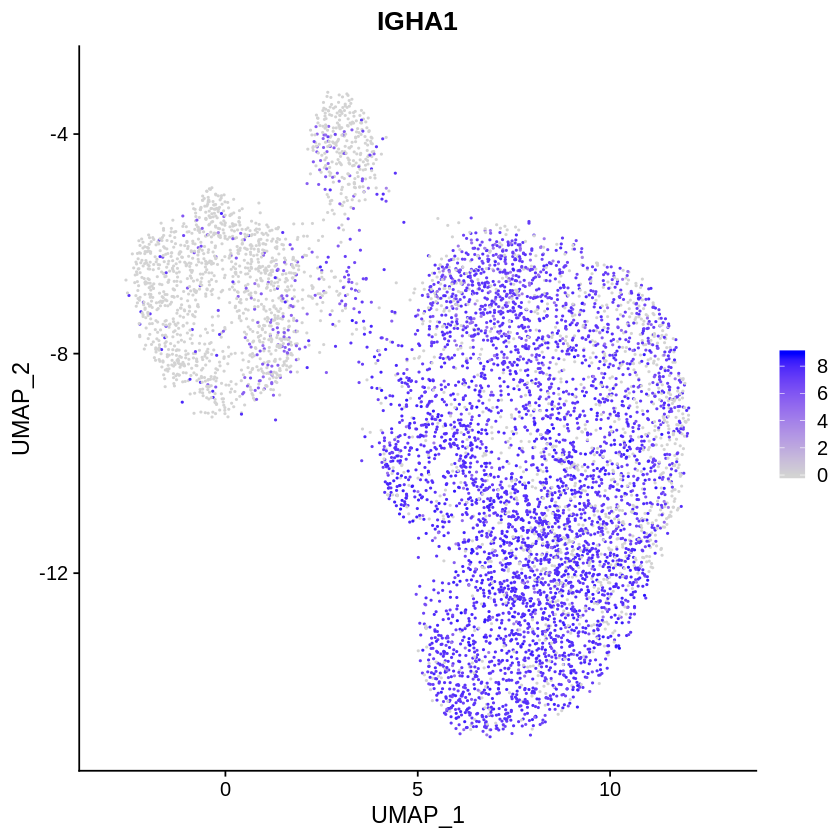

In [46]:
FeaturePlot(plasmas,features='IGHA1')